# Simulation of the experiments

*Python3* notebook simulating the $6$ experiments on the *Case Study* regulated metabolic network. The notebook must be run at least once before being able to play the *CaspoFlux* notebook.

**Requirements:** Python 3 and the modules: pandas, matplotlib, tqdm.

## Parameters

Import the needed *Python* modules:

In [1]:
import os
import shutil
import subprocess
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

Fix the simulation parameters:

In [2]:
model = "CaseStudy"
metabolic_network = f'./data/{model}/metabolic_network.xml'
regulatory_network = f'./data/{model}/regulatory_network.sbml'
output_dir = f'./simulations/{model}'
output_tmpl = '{}.csv'

Retrieves the experiment files:

In [3]:
simulations_cfg = {
    k: {
        'cons': f'./data/{model}/constraints.txt',
        'init': f'./data/{model}/{k}/parametersDFBA.txt'}
    for k in [
        'Experiment1-C1C2O2',
        'Experiment2-C1C2NotO2',
        'Experiment3-NotC1C2NotO2',
        'Experiment4-C1NotC2NotO2',
        'Experiment5-C1NotC2O2',
        'Experiment6-NotC1C2O2']
}
simulations_cfg

{'Experiment1-C1C2O2': {'cons': './data/CaseStudy/constraints.txt',
  'init': './data/CaseStudy/Experiment1-C1C2O2/parametersDFBA.txt'},
 'Experiment2-C1C2NotO2': {'cons': './data/CaseStudy/constraints.txt',
  'init': './data/CaseStudy/Experiment2-C1C2NotO2/parametersDFBA.txt'},
 'Experiment3-NotC1C2NotO2': {'cons': './data/CaseStudy/constraints.txt',
  'init': './data/CaseStudy/Experiment3-NotC1C2NotO2/parametersDFBA.txt'},
 'Experiment4-C1NotC2NotO2': {'cons': './data/CaseStudy/constraints.txt',
  'init': './data/CaseStudy/Experiment4-C1NotC2NotO2/parametersDFBA.txt'},
 'Experiment5-C1NotC2O2': {'cons': './data/CaseStudy/constraints.txt',
  'init': './data/CaseStudy/Experiment5-C1NotC2O2/parametersDFBA.txt'},
 'Experiment6-NotC1C2O2': {'cons': './data/CaseStudy/constraints.txt',
  'init': './data/CaseStudy/Experiment6-NotC1C2O2/parametersDFBA.txt'}}

## Simulation

Define usefull functions:

In [4]:
def met4j_dynamicRFBA(mn, rn, cfg, output):
    subprocess.run(['java', '-Dlog4j.configuration=',
        '-jar', './dist/FlexFlux/met4j-dynamicRFBA.jar',
        '-sol', 'GLPK', 
        '-s', mn, '-reg', rn,
        '-cons', cfg['cons'], '-init', cfg['init'], '-out', output], check=True)

def read_simulation(out):
    df = pd.read_csv(out, sep='\t')
    df.set_index('Time', inplace=True)
    return df

def plot_simulation(df, **kwargs):
    return df.plot(title=f'Simulation {name}', **kwargs)

Clear and create the output directory if needed:

In [5]:
if os.path.isdir(output_dir):
    print(f'removing {output_dir}')
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

removing ./simulations/CaseStudy


Run the simulation for each experiments:

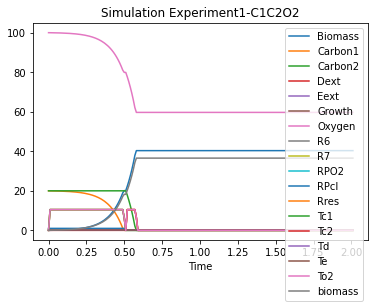

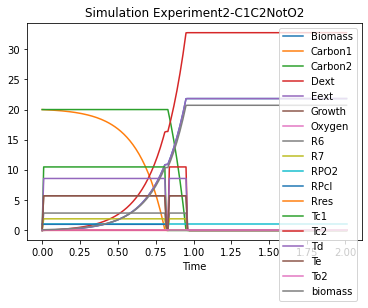

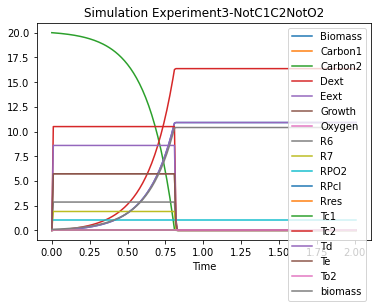

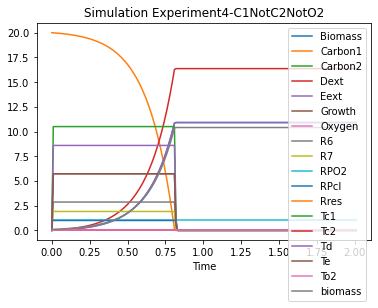

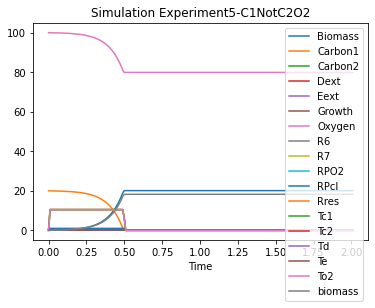

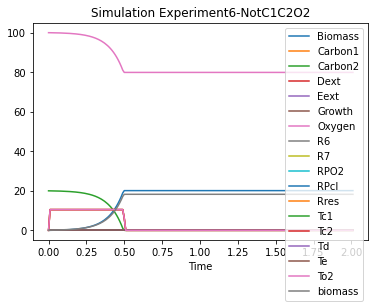

In [6]:
for name, cfg in tqdm(simulations_cfg.items()):
    out = os.path.join(output_dir, output_tmpl.format(name))
    met4j_dynamicRFBA(metabolic_network, regulatory_network, cfg, out)
    plt.show(plot_simulation(read_simulation(out)))

Path to the output simulation files:

In [7]:
os.path.abspath(output_dir)

'/notebook/simulations/CaseStudy'